In [ ]:
import os
import pandas as pd
from diffusers import StableDiffusionPipeline
import torch
import time
import random

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

In [ ]:
!pip install diffusers transformers accelerate scipy torch

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# Load the pipeline for text-to-image generation
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

# Define your prompt
prompt = "A scenic landscape with mountains and a clear blue sky"

# Generate the image
image = pipe(prompt).images[0]

# Save and display the image
image.save("output_image.png")
image.show()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

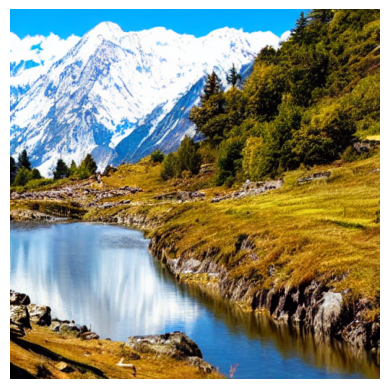

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
import pandas as pd
from diffusers import StableDiffusionPipeline
import torch
import time
import random

model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe = pipe.to("cuda")

def generate_images(prompt, num_images):
    images = []
    for i in range(num_images):
        print(f"Generating image {i+1} of {num_images}...")
        time.sleep(random.randint(1, 5))
        image = pipe(prompt).images[0]
        filename = f"{prompt.replace(' ', '_')}_{i+1}.png"
        image.save(filename)
        images.append(image)
    return images

def collect_reviews(images):
    reviews = []
    for i, image in enumerate(images, start=1):
        rating = int(input(f"Please rate image {image} (1 to 5 stars): "))
        reviews.append((image, rating))
    return reviews

def save_reviews_to_csv(reviews):
    df = pd.DataFrame(reviews, columns=["Image", "Rating"])
    if os.path.exists("image_reviews.csv"):
        df.to_csv("image_reviews.csv", mode='a', header=False, index=False)
    else:
        df.to_csv("image_reviews.csv", index=False)
    print("Reviews saved to image_reviews.csv.")

def recommend_images():
    if os.path.exists("image_reviews.csv"):
        df = pd.read_csv("image_reviews.csv")
        recommended = df[df["Rating"] >= 4]
        if not recommended.empty:
            print("Recommended images based on your ratings:")
            print(recommended)
        else:
            print("No recommendations based on your ratings.")
    else:
        print("No previous reviews found.")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
prompt = input("Enter your image generation prompt: ")
num_images = int(input("How many images would you like to generate? "))

images = generate_images(prompt, num_images)

reviews = collect_reviews(images)

save_reviews_to_csv(reviews)
recommend_images()

Generating image 1 of 2...


  0%|          | 0/50 [00:00<?, ?it/s]

Generating image 2 of 2...


  0%|          | 0/50 [00:00<?, ?it/s]

KeyboardInterrupt: Interrupted by user